# Librerías

In [ ]:
import torch
import matplotlib.pyplot as plt
import os
import sys
import time
import platform


In [2]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# device = 'cpu'
print('Using device:', device)

Using device: cuda


In [3]:
# Propiedades del sistema
system_specs = {
    "os": platform.system(),  # e.g. "Linux", "Windows", "Darwin"
    "os_version": platform.version(),
    "machine": platform.machine(),  # e.g. "x86_64"
    "processor": platform.processor(),  # e.g. "Intel64 Family 6 Model 158"
    "python_version": platform.python_version(),
    "device": str(device)
}
if torch.cuda.is_available():
    system_specs["gpu_name"] = torch.cuda.get_device_name(0)
    system_specs["gpu_memory_total_GB"] = round(torch.cuda.get_device_properties(0).total_memory / (1024**3), 2)
    system_specs["cuda_version"] = torch.version.cuda
    print("system_specs", system_specs)


system_specs {'os': 'Windows', 'os_version': '10.0.22000', 'machine': 'AMD64', 'processor': 'Intel64 Family 6 Model 158 Stepping 10, GenuineIntel', 'python_version': '3.12.9', 'device': 'cuda', 'gpu_name': 'NVIDIA GeForce RTX 2060', 'gpu_memory_total_GB': 6.0, 'cuda_version': '12.1'}


In [4]:
dir_path = os.getcwd()
print(dir_path)

c:\Users\ramse\Escritorio\Aero Ordenador\4to Aero\2do Cuatri\Repo_TFG\ia_thermal\ernestoemedina\GCN_MK1


In [5]:
# Ruta del dataset completo
dataset_path = os.path.join(dir_path, "Datasets", "PCB_dataset.pth")

# Cargar dataset
dataset = torch.load(dataset_path)

C:\Users\ramse\AppData\Local\Temp\ipykernel_2760\1156876384.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  dataset = torch.load(dataset_path)


In [19]:
# Seleccionar un índice para graficar
idx = 0  # Puedes cambiar este valor

# Obtener los valores reales de las CC en T, Q y T_env
T_interfaces_real = dataset.denormalize_T_interfaces(dataset.T_interfaces[idx])
Q_heaters_real = dataset.denormalize_Q_heaters(dataset.Q_heaters[idx])
T_env_real = dataset.denormalize_T_env(dataset.T_env[idx])

# Estos son los datos usados para la estandarización
T_interfaces_mean = dataset.T_interfaces_mean
T_interfaces_std = dataset.T_interfaces_std
Q_heaters_mean = dataset.Q_heaters_mean
Q_heaters_std = dataset.Q_heaters_std

print("T_interfaces mean:", T_interfaces_mean.item())
print("T_interfaces std:", T_interfaces_std.item())

print("Q_heaters mean:", Q_heaters_mean.item())
print("Q_heaters std:", Q_heaters_std.item())

T_interfaces mean: 6.747701168060303
T_interfaces std: 43.39500427246094
Q_heaters mean: 0.015940874814987183
Q_heaters std: 0.11447003483772278


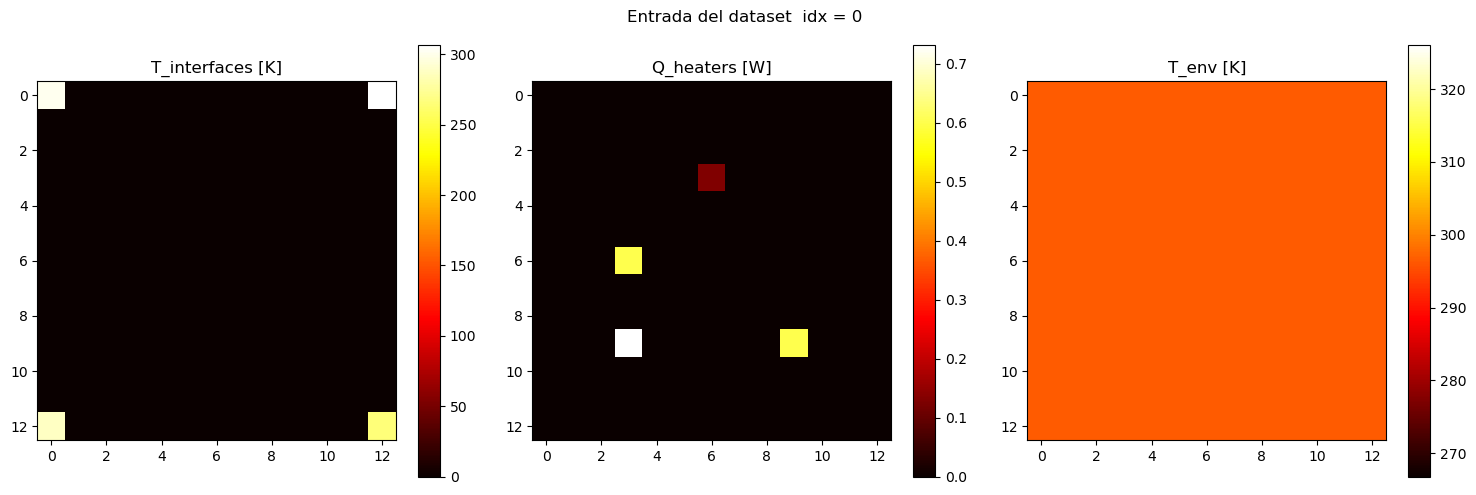

In [20]:
# Crear figura para mostrar las 3 variables
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
im1 = axs[0].imshow(T_interfaces_real.numpy(), cmap='hot')
axs[0].set_title("T_interfaces [K]")
plt.colorbar(im1, ax=axs[0])

im2 = axs[1].imshow(Q_heaters_real.numpy(), cmap='hot')
axs[1].set_title("Q_heaters [W]")
plt.colorbar(im2, ax=axs[1])

im3 = axs[2].imshow(T_env_real.numpy(), cmap='hot')
axs[2].set_title("T_env [K]")
plt.colorbar(im3, ax=axs[2])

plt.suptitle(f"Entrada del dataset  idx = {idx}")
plt.tight_layout()
plt.show()

In [25]:
# Medias de un solo gráfico
idx = 0
media_interfaces_local = torch.mean(dataset.denormalize_T_interfaces(dataset.T_interfaces[idx]))
media_heaters_local = torch.mean(dataset.denormalize_Q_heaters(dataset.Q_heaters[idx]))

print(f"Media local T_interfaces[{idx}]:", media_interfaces_local.item())
print(f"Media local Q_heaters[{idx}]:", media_heaters_local.item())

Media local T_interfaces[0]: 6.8732781410217285
Media local Q_heaters[0]: 0.012212674133479595


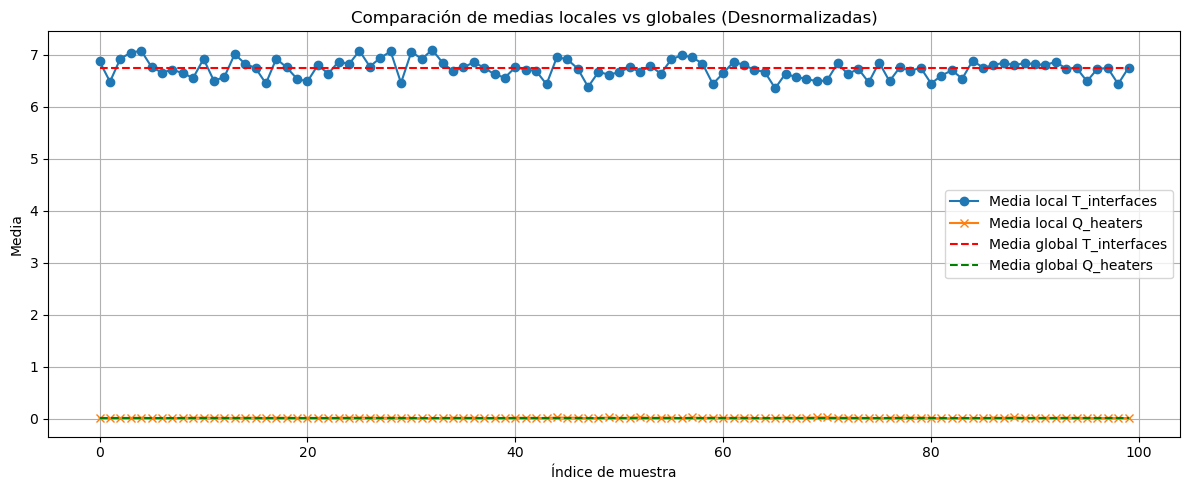

In [28]:
# Número de muestras a analizar
N = 100  # Puedes aumentarlo si quieres

# Listas para guardar las medias locales
medias_interfaces = []
medias_heaters = []

for i in range(N):
    media_i = torch.mean(dataset.denormalize_T_interfaces(dataset.T_interfaces[i]))
    media_q = torch.mean(dataset.denormalize_Q_heaters(dataset.Q_heaters[i]))
    medias_interfaces.append(media_i.item())
    medias_heaters.append(media_q.item())

# Medias globales del dataset
mean_global_interfaces = dataset.T_interfaces_mean.item()
mean_global_heaters = dataset.Q_heaters_mean.item()

# Crear gráfico
plt.figure(figsize=(12, 5))

plt.plot(medias_interfaces, label='Media local T_interfaces', marker='o')
plt.plot(medias_heaters, label='Media local Q_heaters', marker='x')
plt.hlines(mean_global_interfaces, 0, N-1, colors='red', linestyles='dashed', label='Media global T_interfaces')
plt.hlines(mean_global_heaters, 0, N-1, colors='green', linestyles='dashed', label='Media global Q_heaters')

plt.xlabel('Índice de muestra')
plt.ylabel('Media')
plt.title('Comparación de medias locales vs globales (Desnormalizadas)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()